<a href="https://colab.research.google.com/github/Trishika0611/CODTECH-IT-SOLUTIONS/blob/main/TASK_3_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Task 3: CNN for Image Classification
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(X_train)

model = models.Sequential([
    layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

lr_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                 patience=3,
                                 factor=0.5,
                                 min_lr=1e-5,
                                 verbose=1)
early_stop = EarlyStopping(monitor='val_accuracy', patience=7, restore_best_weights=True)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=25,
    validation_data=(X_test, y_test),
    callbacks=[lr_reduction, early_stop]
)

test_loss, test_acc = model.evaluate(X_test, y_test)
print("\nTest Accuracy: {:.2f}%".format(test_acc * 100))

model.save("cnn_cifar10_model.h5")


Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 59ms/step - accuracy: 0.3299 - loss: 2.1276 - val_accuracy: 0.5077 - val_loss: 1.4271 - learning_rate: 0.0010
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.5383 - loss: 1.2907 - val_accuracy: 0.5861 - val_loss: 1.1985 - learning_rate: 0.0010
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.6183 - loss: 1.0686 - val_accuracy: 0.6240 - val_loss: 1.1267 - learning_rate: 0.0010
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.6661 - loss: 0.9516 - val_accuracy: 0.6977 - val_loss: 0.9099 - learning_rate: 0.0010
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.6980 - loss: 0.8721 - val_accuracy: 0.7276 - val_loss: 0.7970 - learning_rate: 0.0010
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.7160 - loss: 0.8150 - val_accuracy: 0.6355 - val_loss: 1.1939 - learning_rate: 0.0010
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 44ms/step - accuracy: 0.7283 - l


Test Accuracy: 86.33%


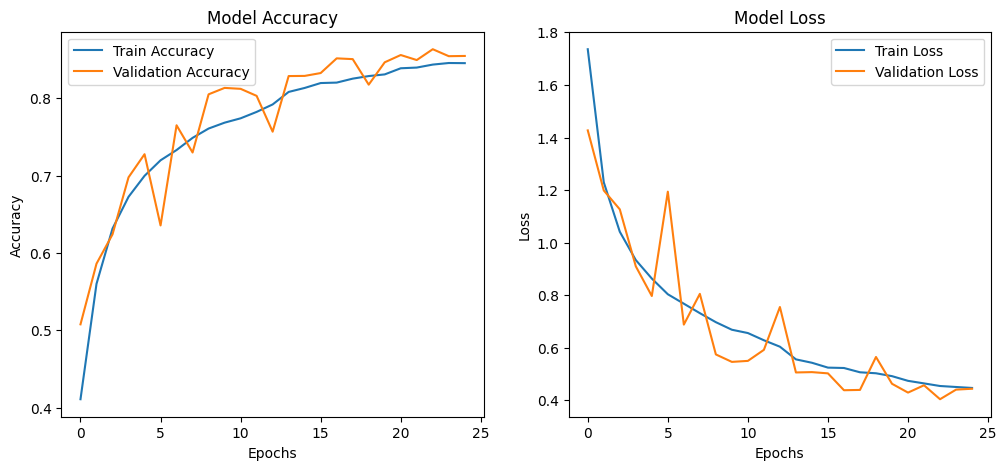

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


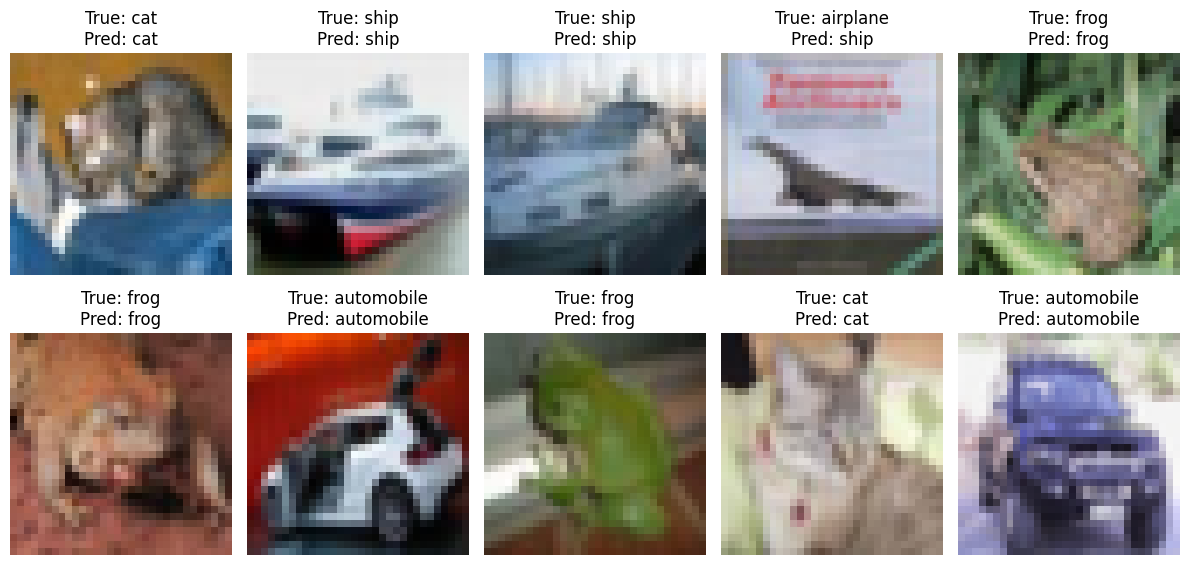

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Plot training accuracy and loss
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Show some sample predictions
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

plt.figure(figsize=(12,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i])
    plt.title(f"True: {class_names[y_test[i][0]]}\nPred: {class_names[y_pred_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
